Jan 12 2021 (Tue)

# 파일 읽어오기
- line단위로 계속 읽어 온다
- 만약 새로운 텍스트를 추가로 저장하면 다시 읽어서 출력한다 -> while문이기 때문

In [6]:
from kafka import KafkaProducer
import time

### read()
- 전체 다 읽어오기

In [7]:
fp = open(r"C:\Users\master4\Documents\eunseo\a.txt")
r  = fp.read() # 전체 다 읽어오기
print(r)

aaa
bbb
ccc
ddd
eee
fff
hello
hdhdhd


### readline()
- 한 줄만 읽어옴
- 읽을게 없으면 빈 문자열 반환
    - False
        - 0, '', []
    - True
        - 0이 아닌 숫자
- while 문 내에서
    - 밑에 줄이 있으면 계속 읽어옴
    

In [15]:
fp = open(r"C:\Users\master4\Documents\eunseo\a.txt")
r = fp.readline()
print(r)
r = fp.readline()
print(r)
r = fp.readline()
print(r)

aaa

bbb

ccc



In [16]:
while True:
    r = fp.readline()
    if r:
        print(r)
    else:
        print('end...')
        break

ddd

eee

fff

hello

hdhdhd
end...


### tell()
- filepointer
- 읽을 대상 **위치값**을 나타낸다

In [24]:
fp = open(r"C:\Users\master4\Documents\eunseo\a.txt")
print( fp.tell() )
r = fp.read(3) 
print( fp.tell() )
print(r)
fp.close()

0
3
aaa


### seek()
- 읽을 대상 위치를 강제로 바꿈

In [28]:
fp = open(r"C:\Users\master4\Documents\eunseo\a.txt")
print( fp.tell() )
r = fp.read(3) 
fp.seek(2)
print( fp.seek(2) )

0
2


In [ ]:
fp = open(r"C:\Users\master4\Documents\eunseo\a.txt")
while True:
    pos = fp.tell()
    line = fp.readline()
    if line:
        print(line) # a.txt에 새로운 텍스트가 추가될때마다 추가적으로 출력
    else:
        time.sleep(1) # 1초 후에
        fp.seek(pos) # 빈 문자열이면 

# log파일 읽어오기

- Tomcat log값 보기
    - C:\Program Files\Apache Software Foundation\Tomcat 9.0\logs
- **web에 접속할 때마다 log값을 읽어오기**
    - web은 어디에 위치?
        - Root경로
            - C:\Program Files\Apache Software Foundation\Tomcat 9.0\webapps\ROOT
            - root경로에 html만들어서 읽어오면 됨
    - log란?
        - 접속 ip주소와 요청한 페이지, 요청 방식( GET, POST )

# 왜 python 말고 spark stream을 쓰나
- **빅데이터 처리 위해**. 메모리가 커서 밀려오는 stream데이터를 처리하는데 유능하기 때문

# Q. 
- 웹 log를 카프카를 통해 실시간으로 받아서 consumer가 원하는 토픽을 추출해 db에 저장했고 이때 spark가 사용된다고 이해하는게 맞을까요?<br>

# A.
- yes, kafka는 **중개서버**다 <br>
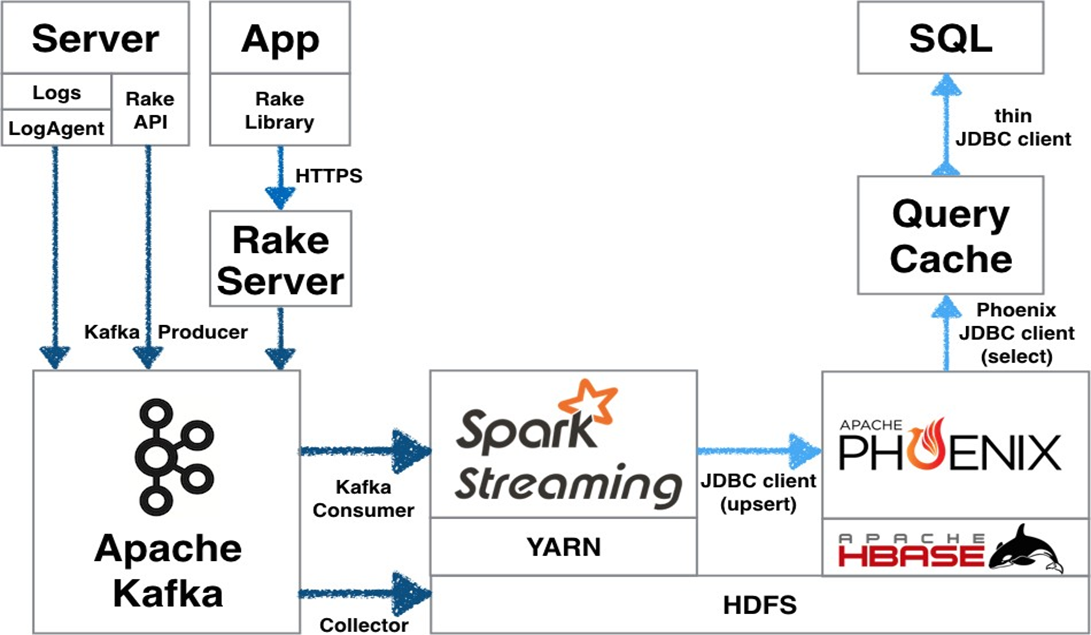

## kafka consumer 실행하고 producer실행하기

In [4]:
producer= KafkaProducer(bootstrap_servers=['localhost:9092'],
                       api_version=(0,10) )

fp = open(r"C:\Program Files\Apache Software Foundation\Tomcat 9.0\logs\localhost_access_log.2021-01-12.txt")
while True:
    pos = fp.tell()
    line = fp.readline()
    if line:
        ln = line.split() # 공백단위로 자르기
        print( ln[0],  ln[6] ) # 공백기준 0, 6번째인 ip주소와 **요청한 문서**
        ip = ln[0].encode() # 바이트로 바꾸기
        doc = ln[6].encode() # 바이트로 바꾸기
        producer.send('sample',key=ip, value=doc)
        producer.flush()
    else:
        time.sleep(1)
        fp.seek(pos)

0:0:0:0:0:0:0:1 /
0:0:0:0:0:0:0:1 /tomcat.svg
0:0:0:0:0:0:0:1 /tomcat.css
0:0:0:0:0:0:0:1 /bg-nav.png
0:0:0:0:0:0:0:1 /bg-upper.png
0:0:0:0:0:0:0:1 /bg-button.png
0:0:0:0:0:0:0:1 /bg-middle.png
0:0:0:0:0:0:0:1 /asf-logo-wide.svg
0:0:0:0:0:0:0:1 /favicon.ico
0:0:0:0:0:0:0:1 /
0:0:0:0:0:0:0:1 /a.html
0:0:0:0:0:0:0:1 /
0:0:0:0:0:0:0:1 /a.html
172.18.55.225 /a.html
172.18.55.225 /favicon.ico
172.18.55.225 /a.html
172.18.55.225 /favicon.ico
172.18.55.225 /a.html
172.18.55.225 /favicon.ico
172.18.55.225 /b.html
172.18.55.225 /b.html
172.18.55.225 /favicon.ico
172.18.55.225 /b.html
172.18.55.225 /favicon.ico
172.18.55.225 /%E3%85%81.html
172.18.55.225 /a.html
172.18.55.225 /b.html
172.18.55.225 /b.html
172.18.55.225 /%E3%85%81.html
172.18.55.225 /a.html


KeyboardInterrupt: 